# Zindi Digital Green Crop Yield Estimate


## Description

&emsp;
Small-scale farmers play a vital role in global food production. In India, they are often the most affected by poverty and malnutrition. They face challenges such as limited access to modern agricultural technologies, unpredictable weather conditions and resource constraints.
<br><br>&emsp;
To solve this problem, we propose to develop a model that will predict the yield per acre of rice or wheat in India. This model will help small farmers better manage their resources, maximize their production and adapt to weather changes. To build our model we will use data from Digital Green, collected through surveys, which will provide us with information on agricultural practices, environmental conditions and crop yields.
<br><br>&emsp;
We will use machine learning to predict yield, as it is generally a better predictor. Machine learning algorithms can identify patterns and relationships that humans cannot and can further learn and continually improve over time as they are exposed to new data. This makes them more reliable for real world applications where data is constantly changing which is ideal in our case where we need to adapt to weather changes.
<br><br>&emsp;
To help farmers adapt to changing weather, we will update our model every year. This will allow us to take these changes into account and improve the accuracy of our yield predictions. To do this, we will continually collect data from users of our solution. This data will be used to update our model.

## Model evaluation
&emsp;
A model will be judged good and therefore applicable if the difference between the prediction and the actual value is small enough that the farmer can obtain a better yield by using it. We will evaluate the model using the root mean square error defined as follows:


$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Pi - Yi)^2}
$$
with, 
- N, number of observations
- Pi, predicted value
- Yi, real value

## 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter("ignore")

sns.set_style("whitegrid")
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100

In [2]:
path = 'data/'

df_train = pd.read_csv(path + "Train.csv")
df_desc = pd.read_csv(path + "VariableDescription.csv", index_col="Variable")

df = df_train.copy()

### 1.1. Dataset Overview

In [3]:
df.shape

(3870, 44)

Our dataframe contains 3870 observations and 44 features.

In [4]:
df.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTracRotavator,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability LabourAvailability,SeedlingAge IrrigWaterAvailability LaborAvailability,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


Here we can look at the first lines of our dataframe.

In [5]:
_df = df.dtypes.value_counts().to_frame()
_df.columns = ["count"]
_df

,count
object,23
float64,14
int64,7


Our dataframe countains 23 non-numerical variables and 21 numerical variables of which 7 are discrete and 14 are continuous. 

In [6]:
mask = (df.isna().sum() / df.shape[0]) > 0
missing = pd.concat( [(df.isna().sum())[mask], (df.isna().sum() / df.shape[0])[mask]], axis=1 )
missing.columns = ["missings", "missings[pct]"]
missing

,missings,missings[pct]
RcNursEstDate,83,0.021447
SeedlingsPerPit,289,0.074677
NursDetFactor,289,0.074677
TransDetFactor,289,0.074677
TransplantingIrrigationHours,193,0.049871
TransplantingIrrigationSource,115,0.029716
TransplantingIrrigationPowerSource,503,0.129974
TransIrriCost,882,0.227907
StandingWater,238,0.061499
OrgFertilizers,1335,0.344961


We observe a few columns with a lot of missing values and we will find a way to deal with them later.

### 1.2. Features Analysis

#### 1.2.1. Numerical features

We will examine the statistics and distributions of the numerical variables in our table.

In [7]:
df.select_dtypes(np.number).describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


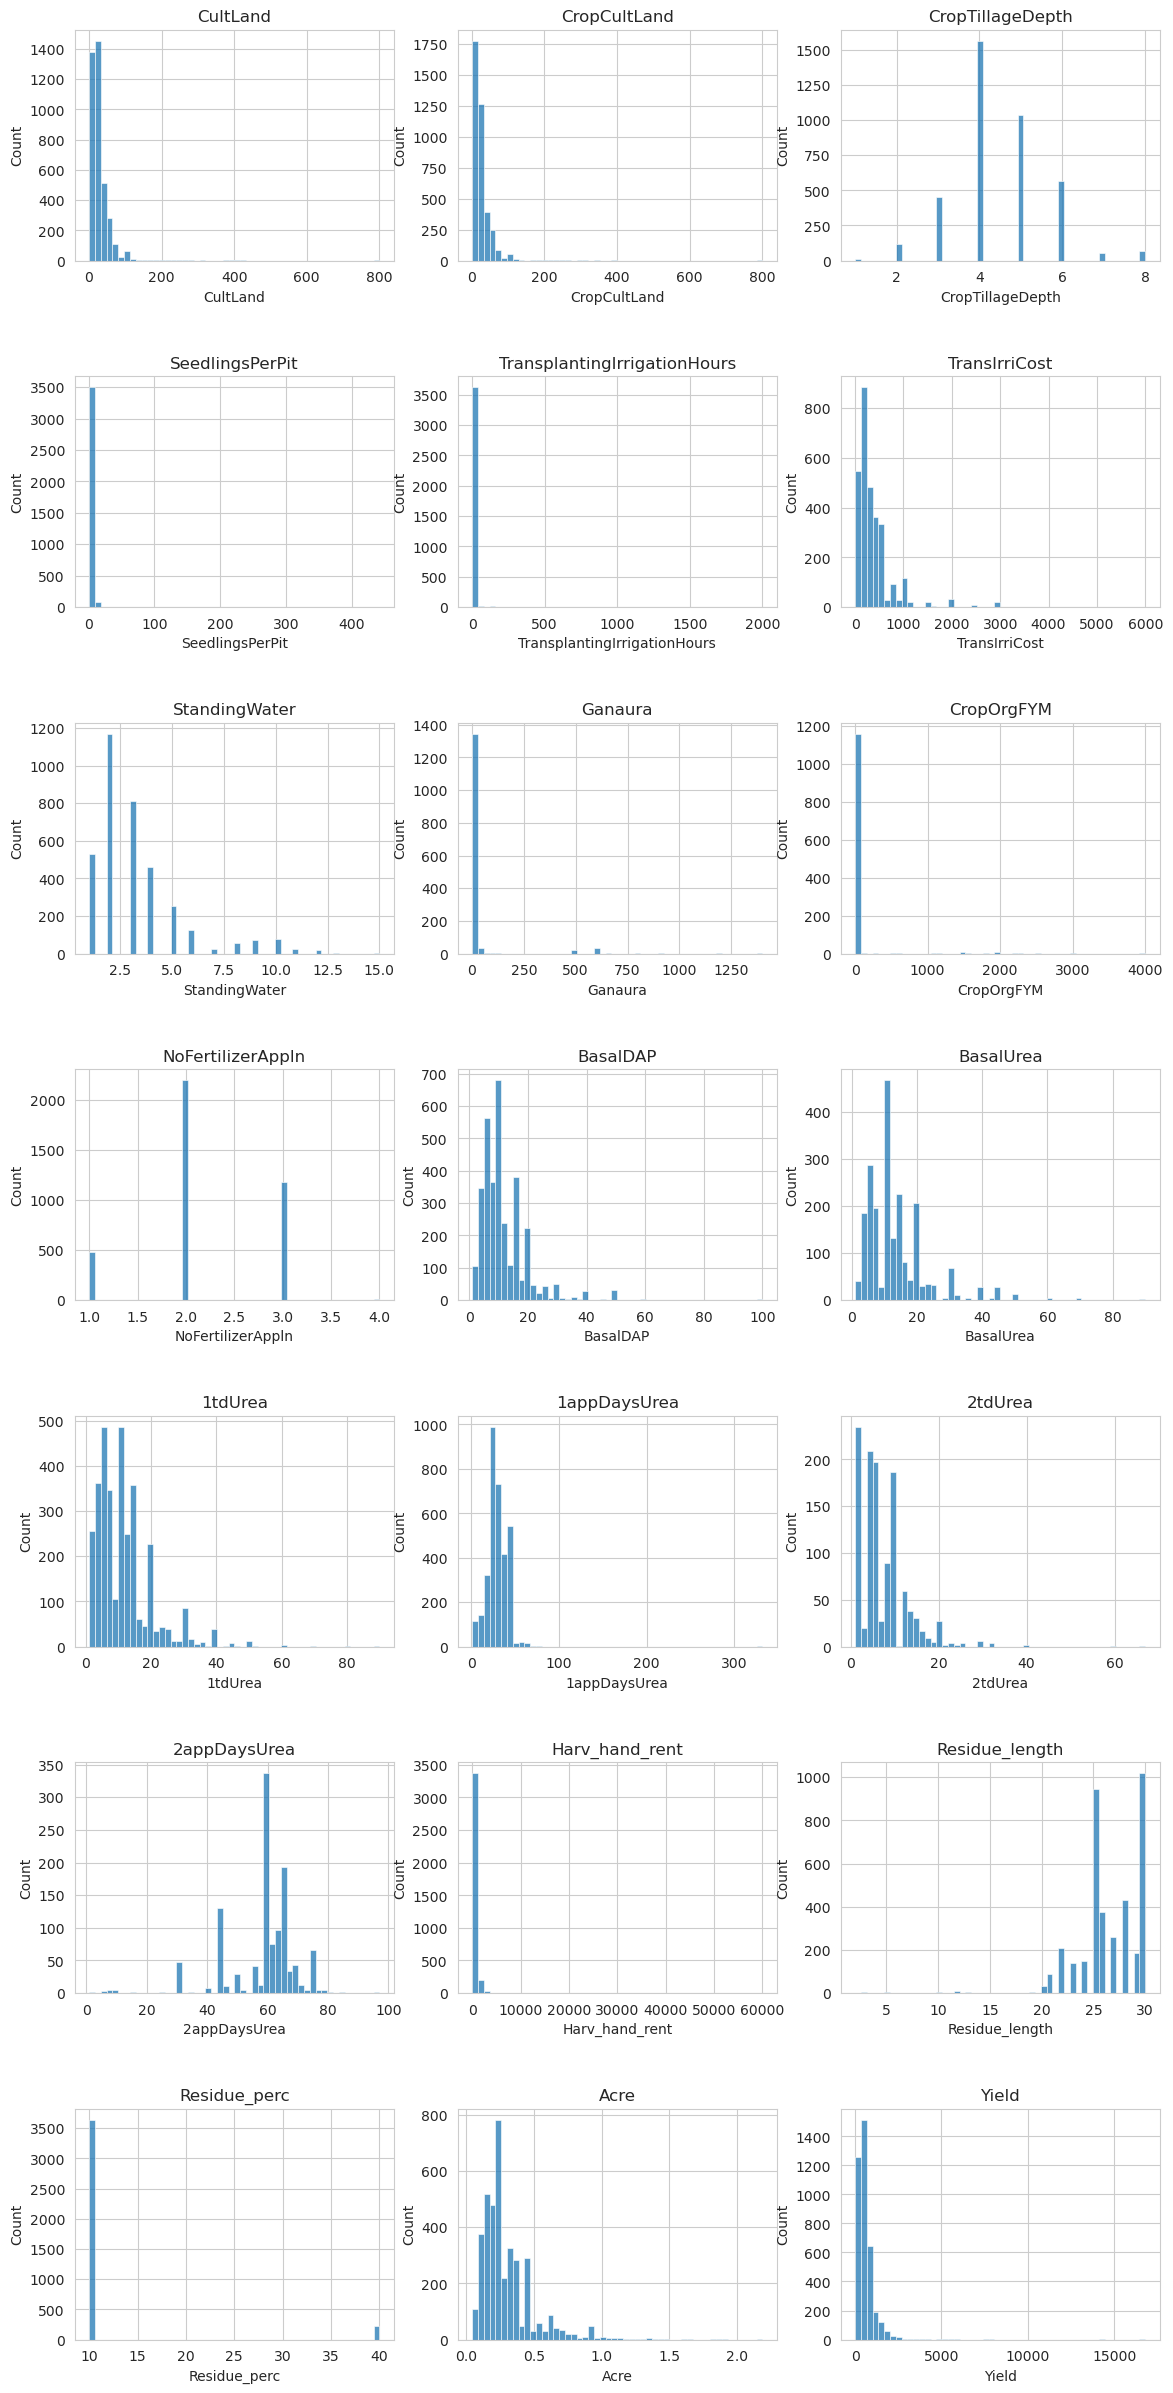

In [8]:
plt.figure(figsize=(14, 30))
plt.subplots_adjust(hspace=0.5)

k = 1
for col in df.select_dtypes(np.number).columns:
    plt.subplot(7, 3, k)
    plt.title(col)
    sns.histplot(data=df, x=col, bins=50)
    k += 1

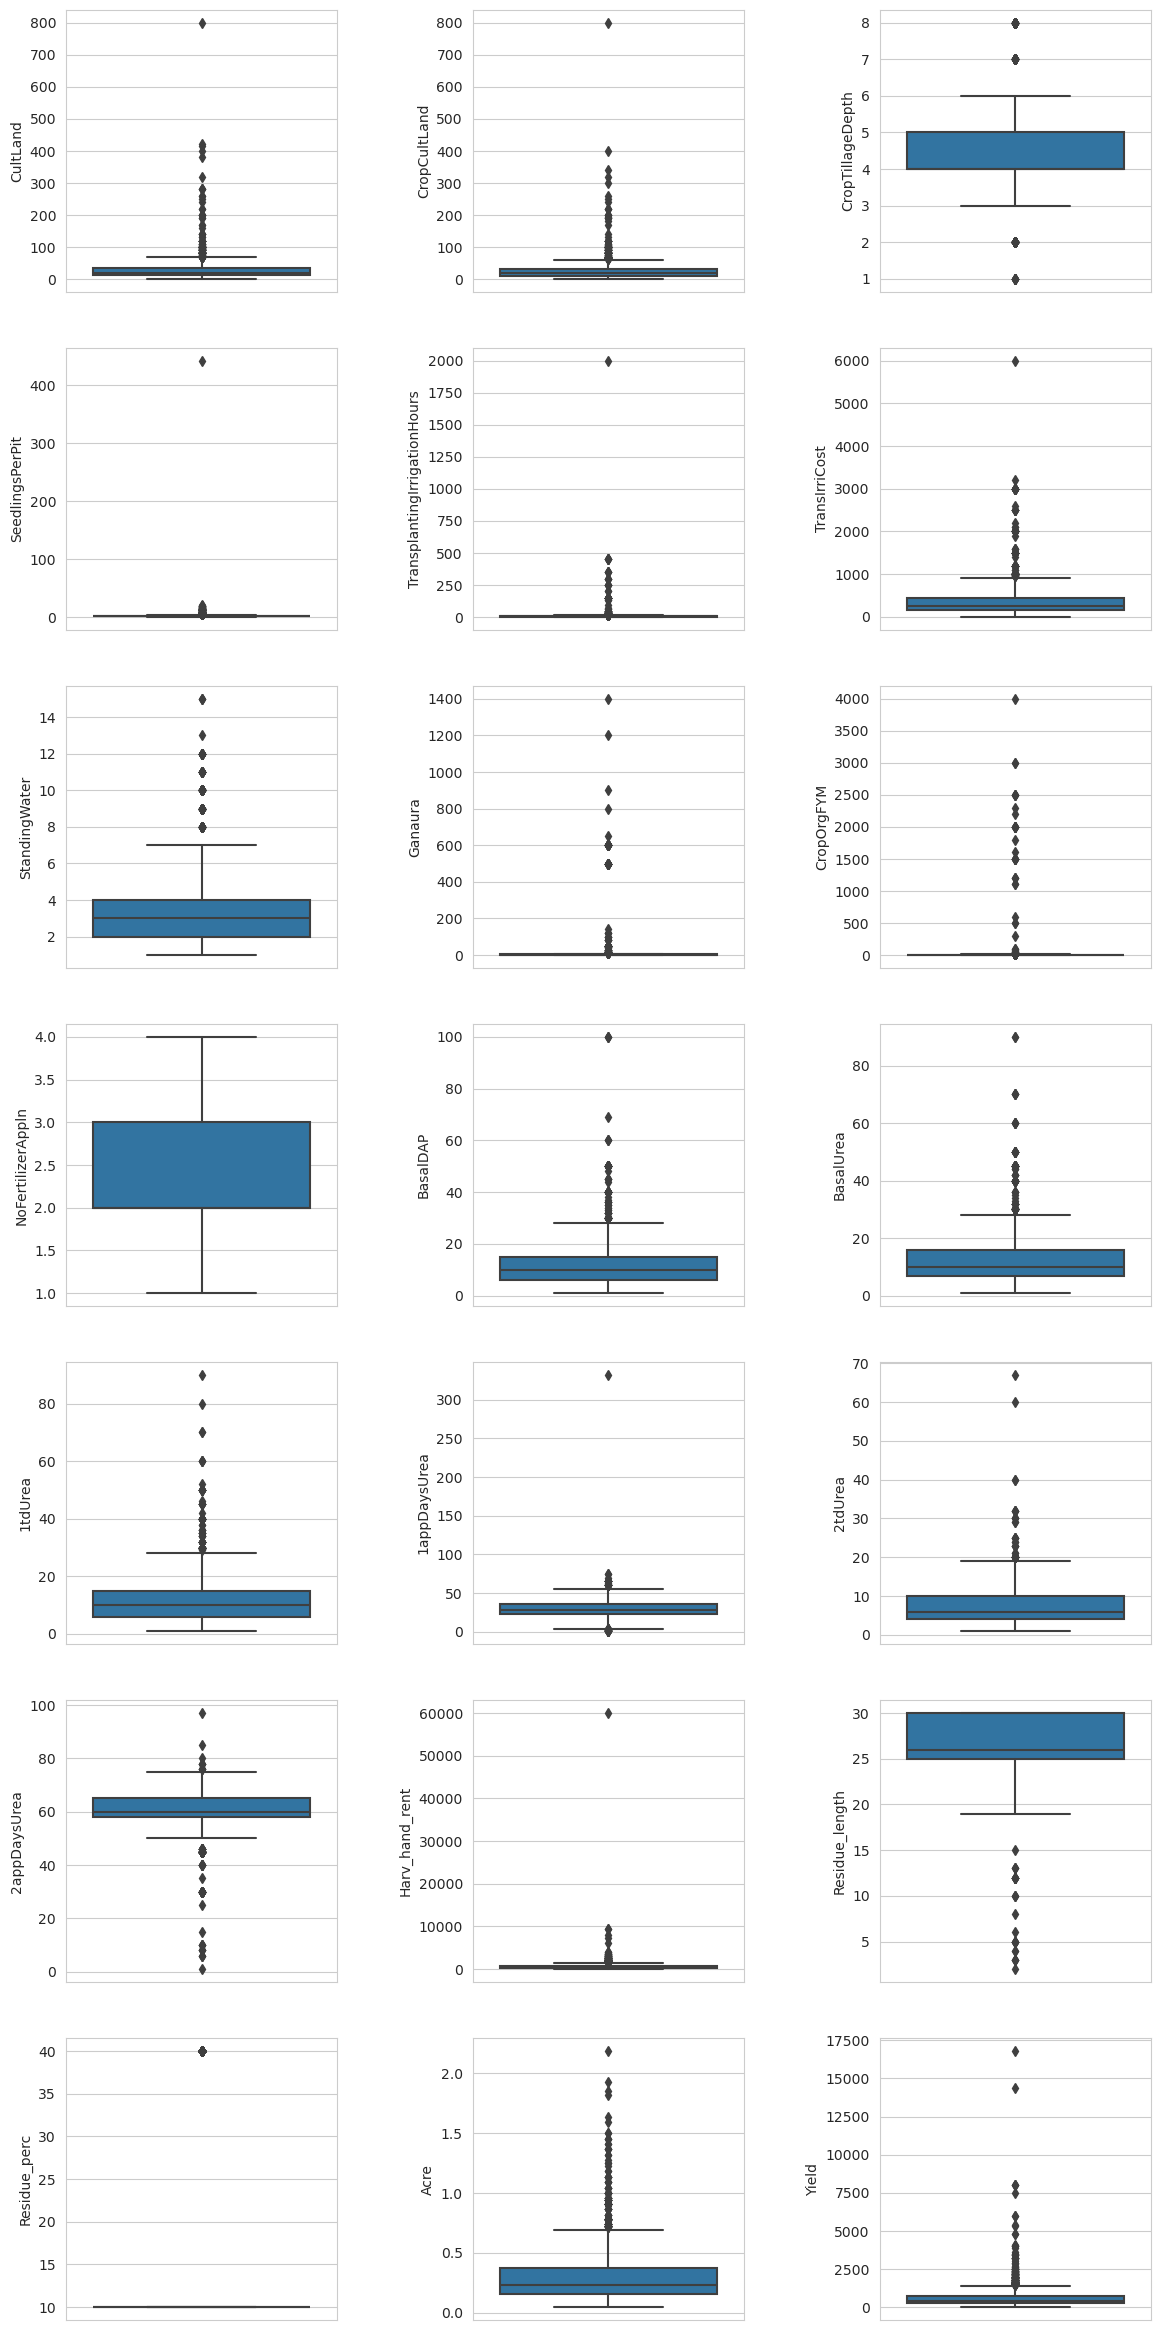

In [9]:
plt.figure(figsize=(14, 30))
plt.subplots_adjust(wspace=0.5)

k = 1
for col in df.select_dtypes(np.number).columns:
    plt.subplot(7, 3, k)
    sns.boxplot(data=df, y=col)
    k += 1

We observe a strong asymmetry in the distribution of most of the variables. The boxplot confirms this trend by highlighting a handful of outliers. These extreme values are all the more remarkable for certain variables whose values are usually located in a precise interval, apart from a few exceptions. Some of these values are likely to be errors during data collection. The extreme values of the *SeedingPerPit*, *TransplantingIrrigationHours* and *Residue_perc* variables are also the most suspect.

Now let's see the correlation between these variables.

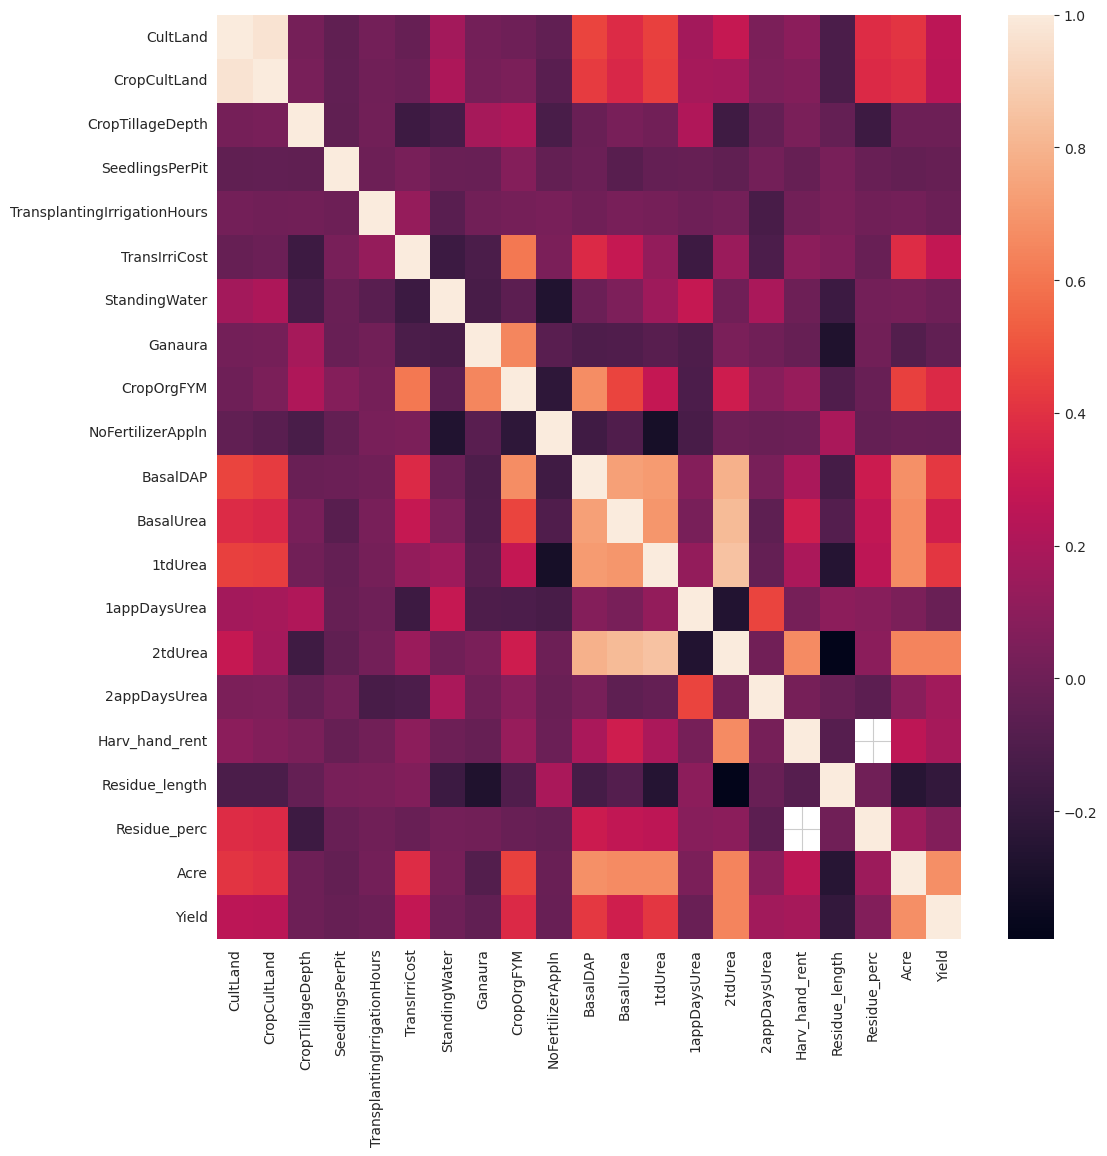

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(np.number).corr());

As we can see, some variables have a reasonable correlation with each other. Among them are variables such as *CultLand* and *CropCultLand* which show good correlation. Additionally, *BasalUrea*, *BasalDAP*, *1dtUrea*, *Acre* and *2dtUrea* demonstrate strong correlations with each other. It is interesting to note that the variable of interest, *Yield*, correlates well with some variables such as *Acre*, which is quite obvious because the larger the cultivated area, the more likely we are to obtain a higher yield.

To better understand the relationship between *Yield* and other numerical data, we will visualize them together.

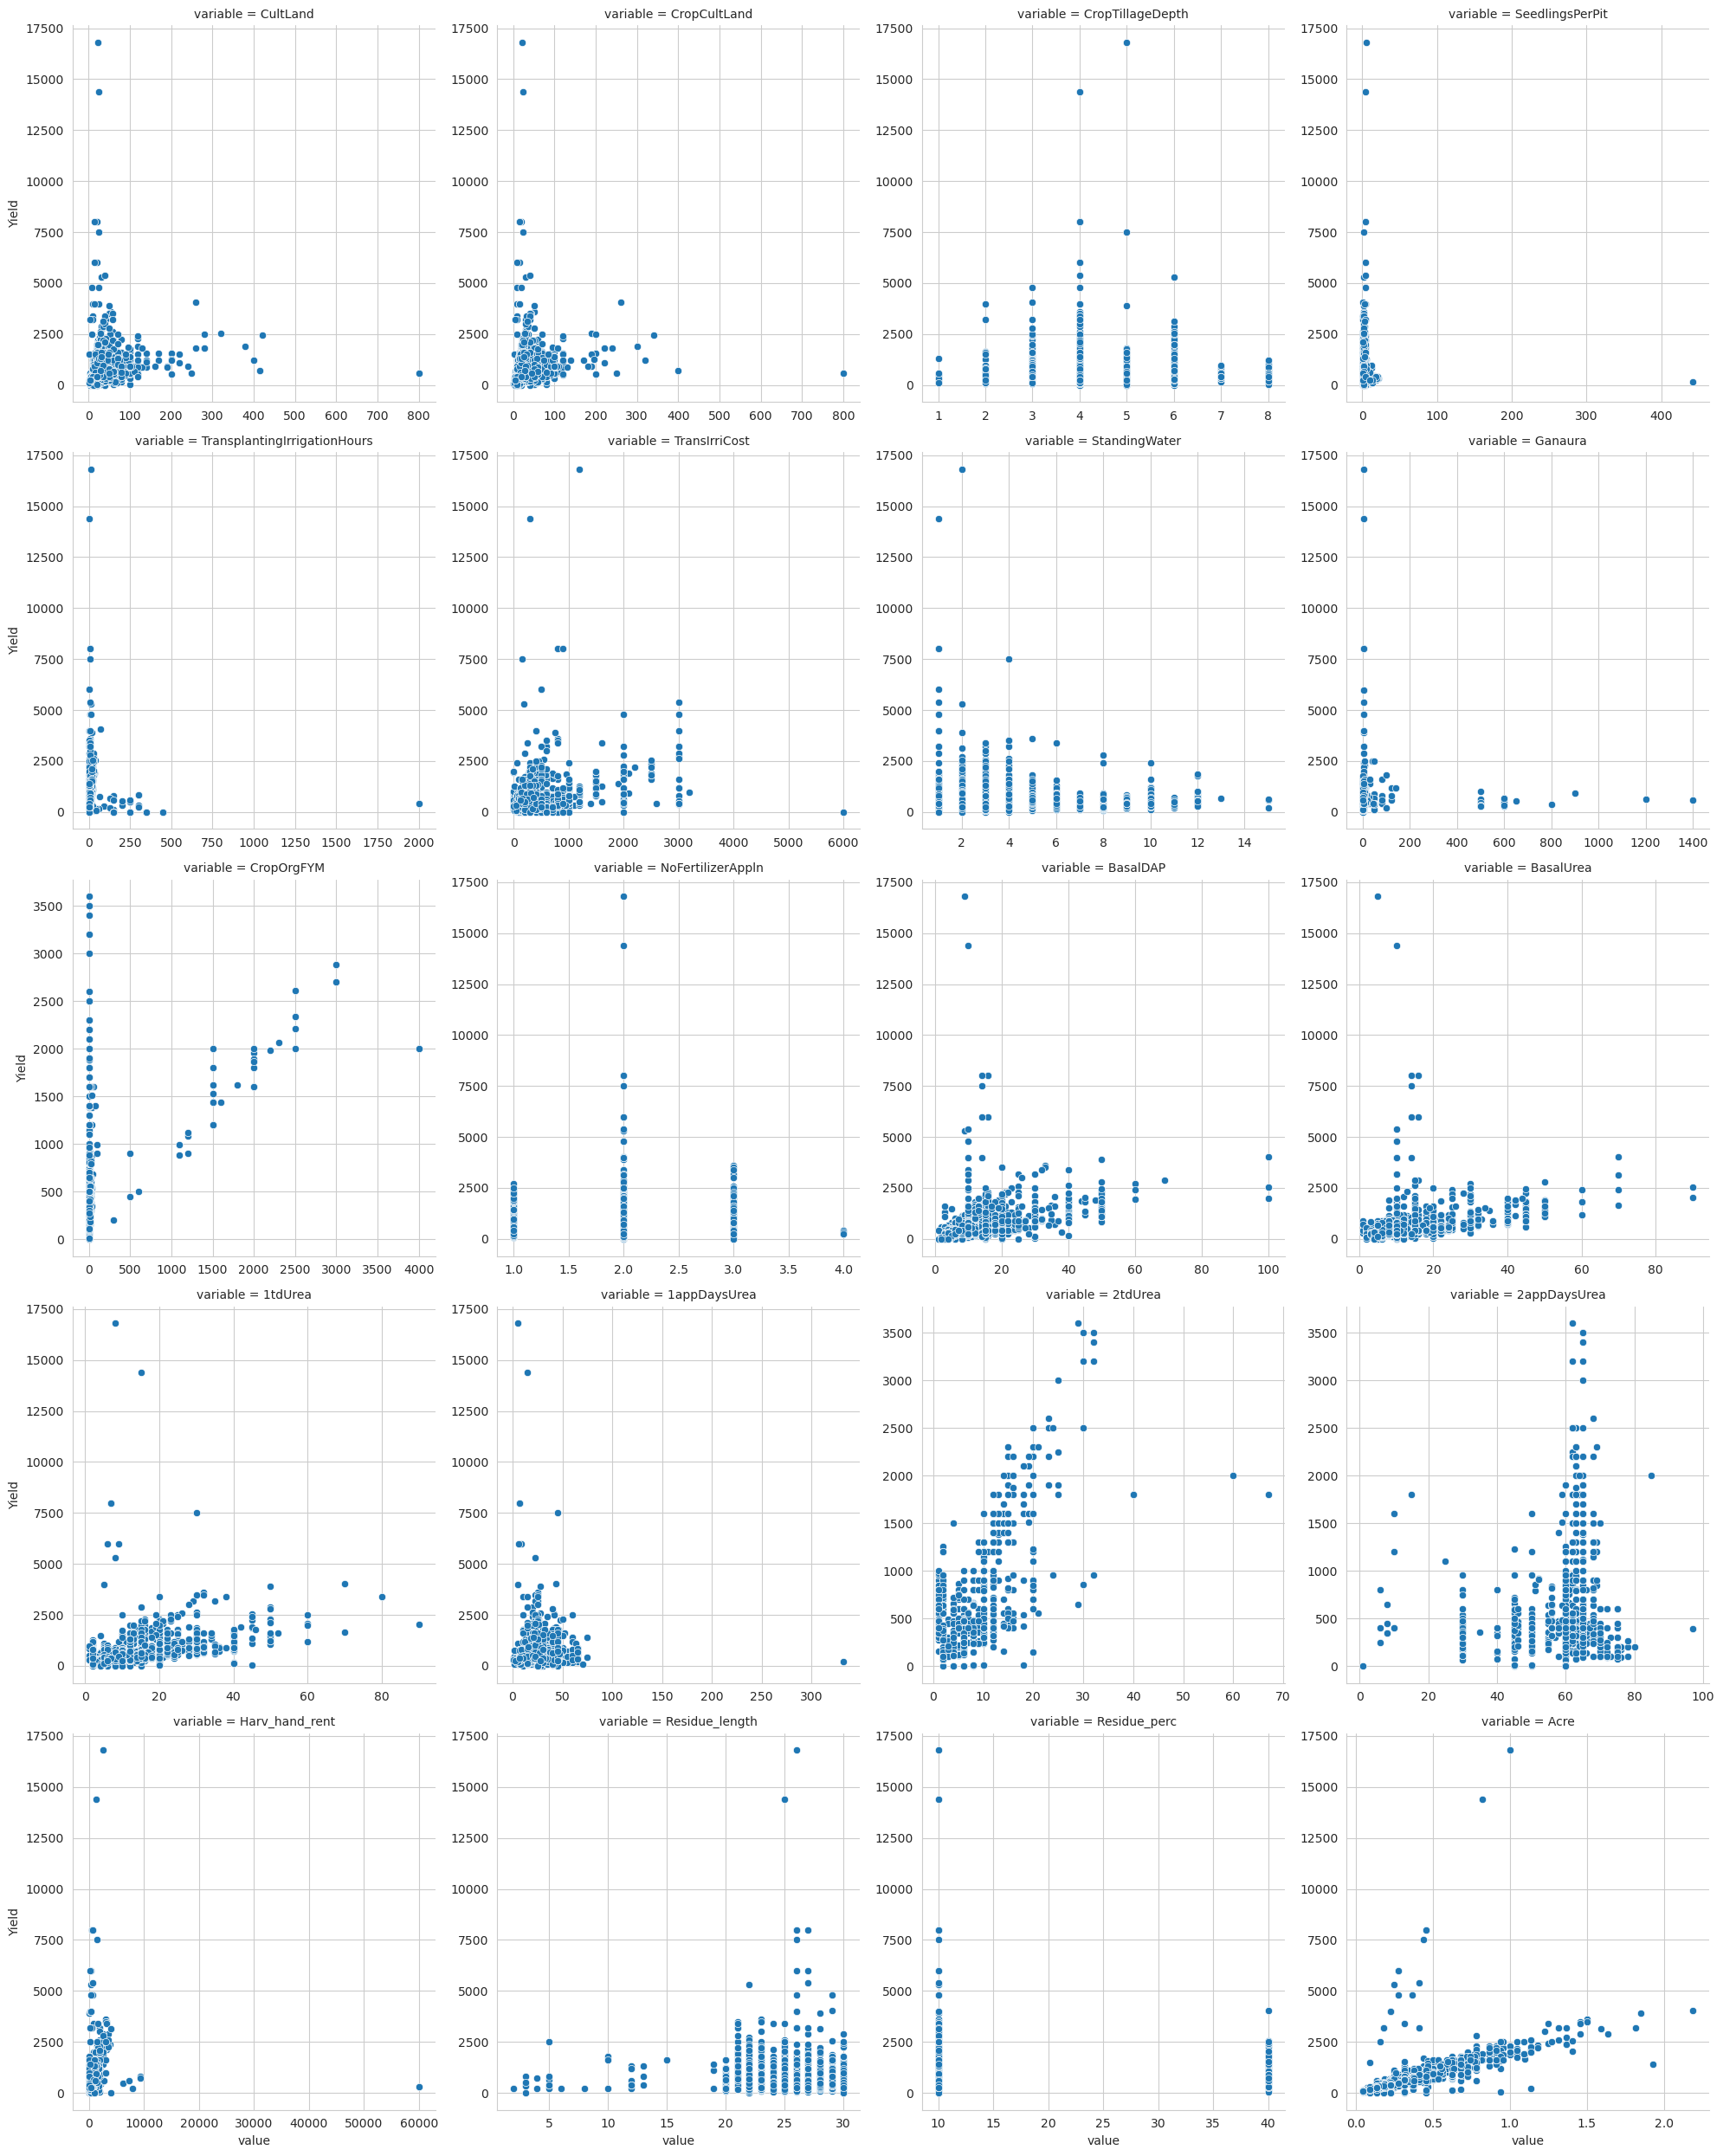

In [11]:
num_cols = df.select_dtypes(np.number).drop(columns="Yield").columns.tolist()

sns.relplot(
    x="value",
    y="Yield",
    col="variable",
    col_wrap=4,
    facet_kws={"sharex":False, "sharey":False},
    data=df.melt(
        id_vars="Yield", value_vars=num_cols
    )
);

It is clear that certain variables have good relationships with the target. At the same time, we are able to observe the outliers more clearly and we see that some of them are probably errors as we suspected previously.

Let's once again summarize the different numerical variables with their correlations with the *Yield* variable in order to see which ones have the most predictive power.

In [12]:
res = pd.DataFrame(
    df.corrwith(df["Yield"]),
    index=df.select_dtypes(np.number).drop(columns="Yield").columns,
    columns=["Correlation"],
)

res.sort_values(by="Correlation", ascending=False)

,Correlation
Acre,0.676554
2tdUrea,0.644100
BasalDAP,0.419260
1tdUrea,0.417841
CropOrgFYM,0.372322
BasalUrea,0.323633
TransIrriCost,0.274761
CultLand,0.254201
CropCultLand,0.246221
Harv_hand_rent,0.181270


#### 1.2.2. Non-numerical features

First, we'll look at all the unique values of the different non-numeric variables in our table.

In [13]:
df.select_dtypes("O").describe()

,ID,District,Block,LandPreparationMethod,CropTillageDate,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,OrgFertilizers,PCropSolidOrgFertAppMethod,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Harv_date,Threshing_date,Threshing_method,Stubble_use
count,3870,3870,3870,3870,3870,3870,3787,3870,3581,3581,3755,3367,2535,2533,3682,3870,3385,3389,3870,3870,3870,3870,3870
unique,3870,4,9,43,78,4,61,62,125,155,6,3,31,4,34,3,14,3,2,107,162,2,2
top,ID_GTFAC7PEVWQ9,Nalanda,Rajgir,TractorPlough,2022-07-20,Manual_PuddledRandom,2022-06-28,2022-07-28,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,Boring,Electric,Ganaura,SoilApplied,DAP Urea,Broadcasting,Urea,Broadcasting,hand,2022-11-05,2022-12-22,machine,plowed_in_soil
freq,1,1193,850,1038,202,3346,225,201,560,858,3228,2645,1295,1680,1640,3214,2798,3288,3642,169,107,2098,3846


We notice columns containing dates and a unique identifier column. Since it does not contain useful information, we will exclude the unique identifier column and analyze the dates later.

In [14]:
date_cols = ["CropTillageDate", "SeedingSowingTransplanting", "Harv_date", "Threshing_date", "RcNursEstDate"]
drop_cols = ["ID"] + date_cols
df.select_dtypes("O").drop(columns=drop_cols).describe()

,District,Block,LandPreparationMethod,CropEstMethod,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,OrgFertilizers,PCropSolidOrgFertAppMethod,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Threshing_method,Stubble_use
count,3870,3870,3870,3870,3581,3581,3755,3367,2535,2533,3682,3870,3385,3389,3870,3870,3870
unique,4,9,43,4,125,155,6,3,31,4,34,3,14,3,2,2,2
top,Nalanda,Rajgir,TractorPlough,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,Boring,Electric,Ganaura,SoilApplied,DAP Urea,Broadcasting,Urea,Broadcasting,hand,machine,plowed_in_soil
freq,1193,850,1038,3346,560,858,3228,2645,1295,1680,1640,3214,2798,3288,3642,2098,3846


In [15]:
df.select_dtypes("O").drop(columns=drop_cols).head()

,District,Block,LandPreparationMethod,CropEstMethod,NursDetFactor,TransDetFactor,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,OrgFertilizers,PCropSolidOrgFertAppMethod,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,MineralFertAppMethod.1,Harv_method,Threshing_method,Stubble_use
0,Nalanda,Noorsarai,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate IrrigWaterAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,Boring,Electric,NaN,NaN,Urea,Broadcasting,Urea,Broadcasting,machine,machine,plowed_in_soil
1,Nalanda,Rajgir,WetTillagePuddling TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,Boring,Electric,NaN,NaN,DAP Urea,Broadcasting,Urea,Broadcasting,hand,machine,plowed_in_soil
2,Gaya,Gurua,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,PreMonsoonShowers IrrigWaterAvailability LabourAvailability,SeedlingAge IrrigWaterAvailability LaborAvailability,Boring,Electric,Ganaura FYM,SoilApplied,DAP,SoilApplied,Urea,RootApplication,hand,machine,plowed_in_soil
3,Gaya,Gurua,TractorPlough FourWheelTracRotavator,Manual_PuddledRandom,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,NaN,NaN,Ganaura,SoilApplied,DAP Urea,Broadcasting,Urea,Broadcasting,hand,hand,plowed_in_soil
4,Nalanda,Noorsarai,TractorPlough WetTillagePuddling,Manual_PuddledRandom,CalendarDate IrrigWaterAvailability SeedAvailability,SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,Boring,Electric,NaN,NaN,Urea DAP,Broadcasting,Urea,Broadcasting,machine,machine,plowed_in_soil


Some variables contain a large number of unique values such as the *NursDetFactor* and *TransDetFactor* variables, while others are limited to around ten. Taking a look at these variables, we notice that those with large numbers of unique values contain a list of values rather than a single value and that the different combinations of these values are likely the cause of the high cardinality.

We will now examine the frequency of values of each non-numeric variable by limiting some of them to their 20 most frequent values.

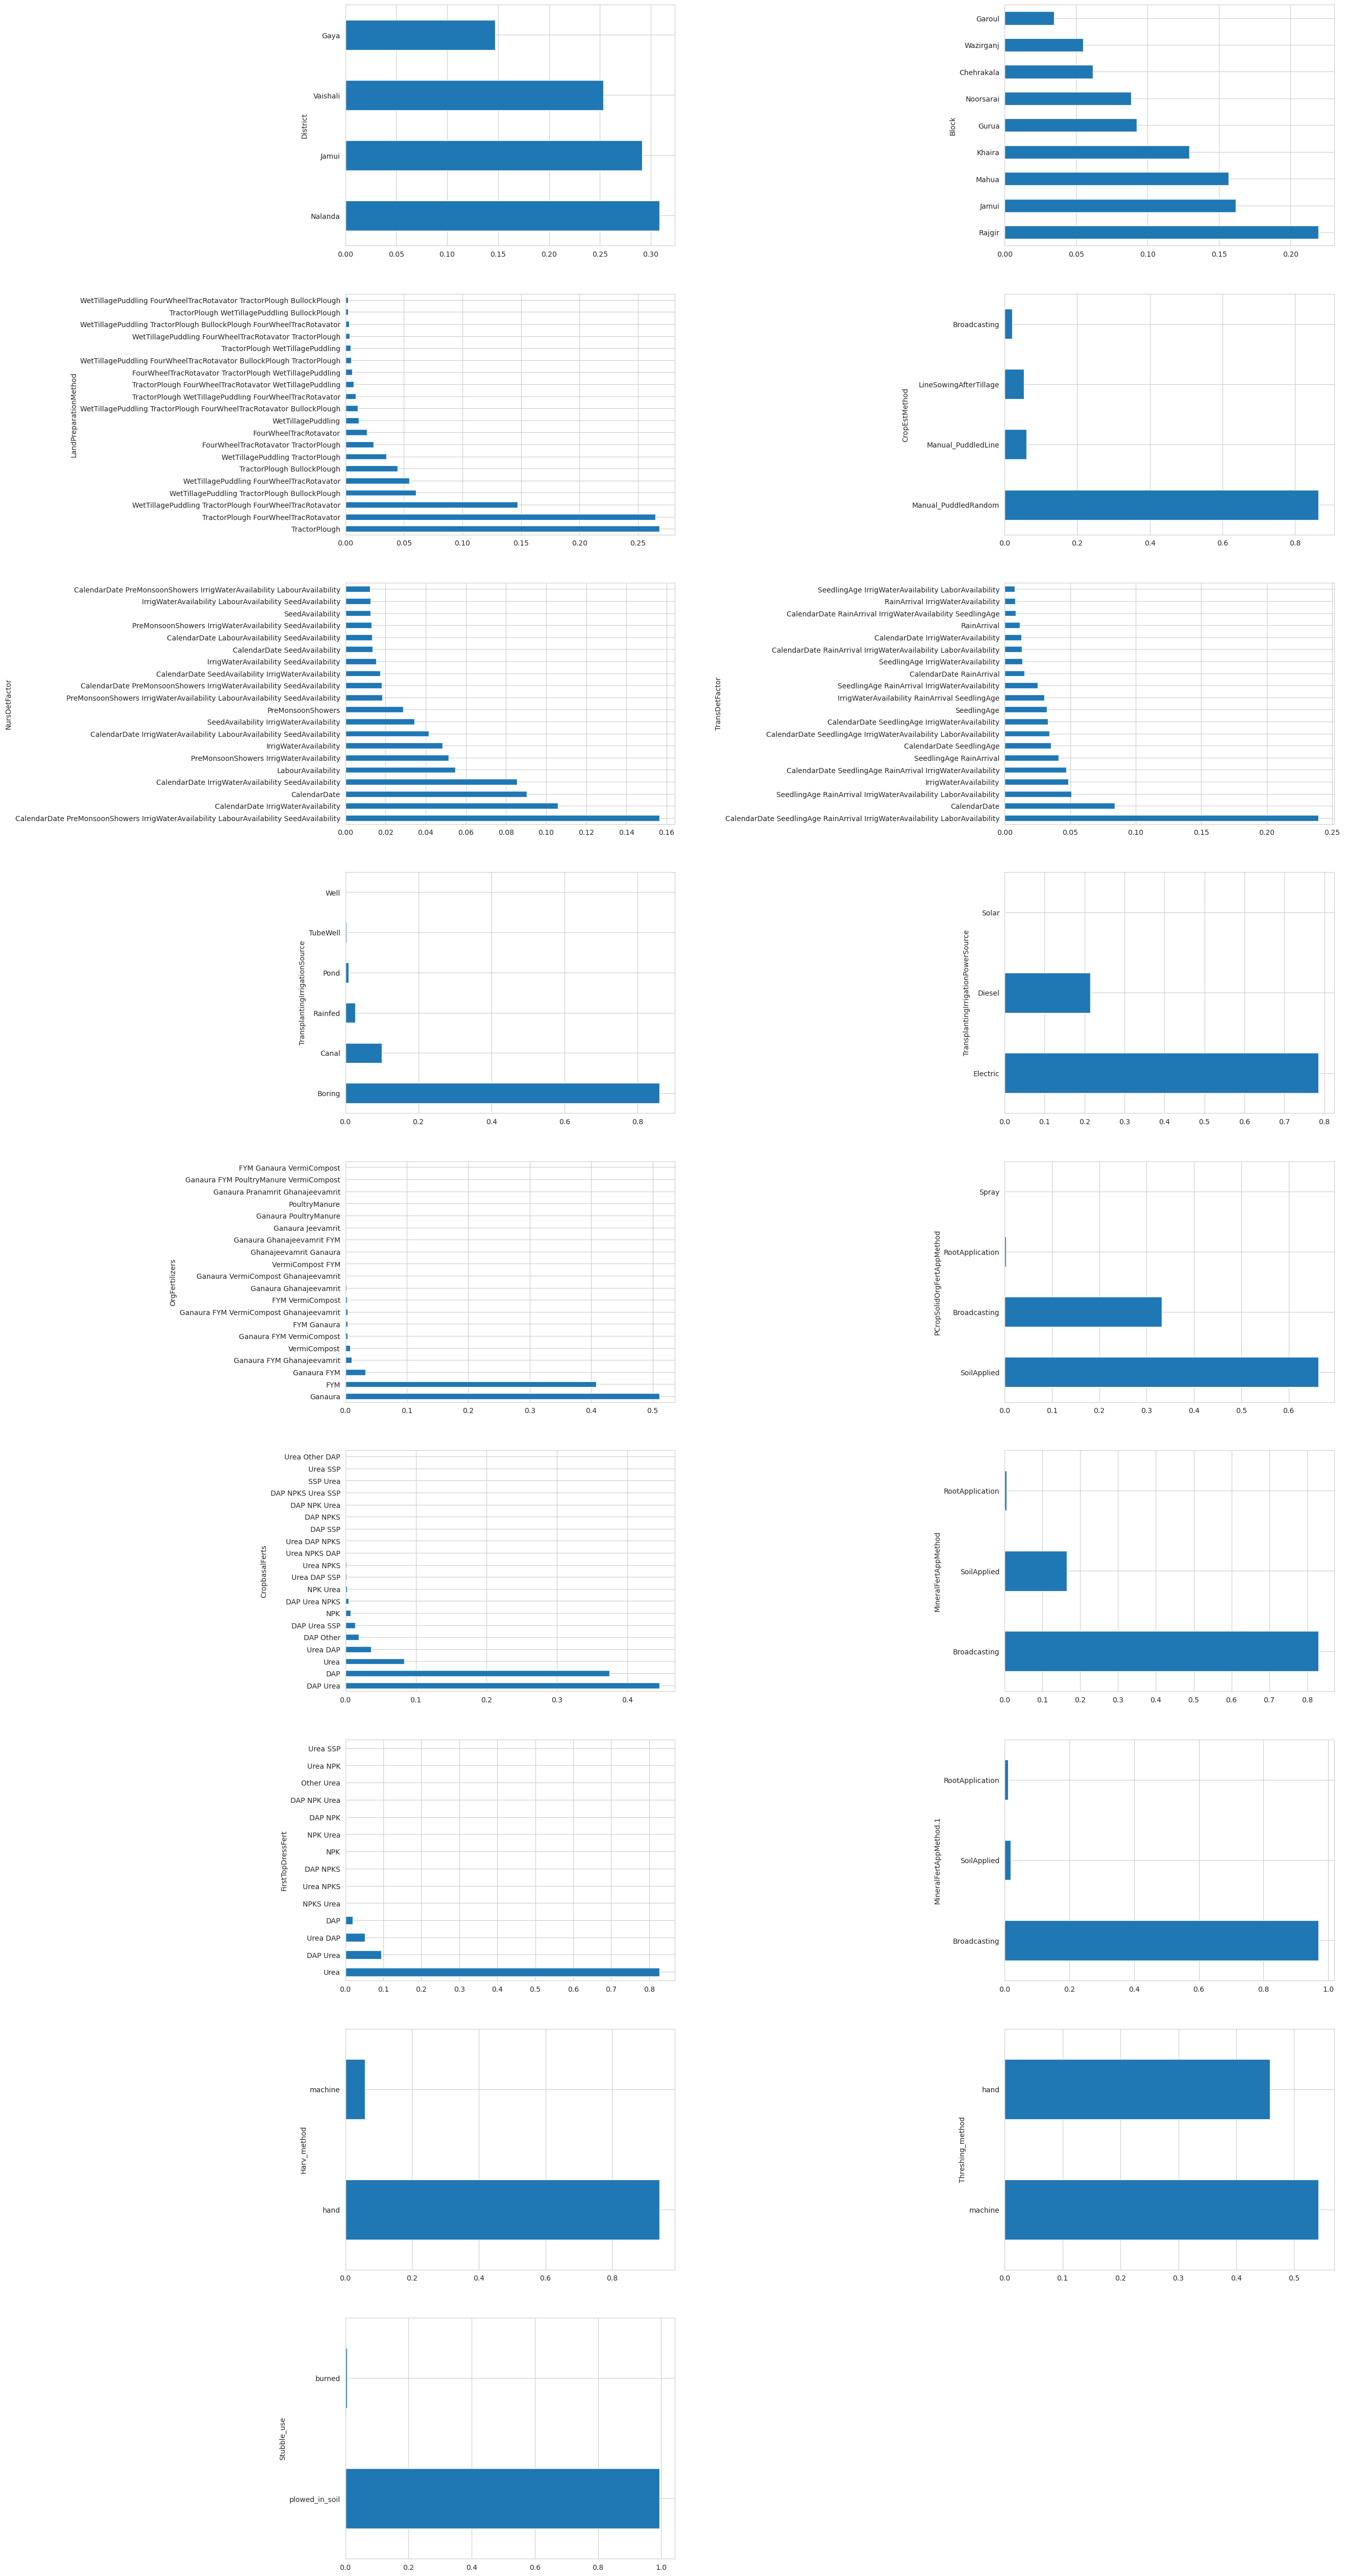

In [16]:
plt.figure(figsize=(25,65))
plt.subplots_adjust(wspace=1)

i = 1
for col in df.select_dtypes("O").drop(columns=drop_cols).columns:
    plt.subplot(9, 2, i)
    df.value_counts(subset=col, normalize=True).head(20).plot.barh()
    i += 1


Most variables are unbalanced, that is, some of their values appear much more frequently than others. This may introduce a bias towards these majority classes in our model, as it will mainly be trained with these values. In addition, the generalization of certain characteristics is limited due to potential values missing from our data. Take *District* for example, our set does not cover all Indian districts and therefore does not allow an exhaustive representation.

Let’s dive into the columns containing dates. Before parsing them, we need to make sure we convert the values to the correct date format.

In [17]:
for i in date_cols:
    df[i] = pd.to_datetime(df[i], format="%Y-%m-%d")

In [18]:
df[date_cols].head()

,CropTillageDate,SeedingSowingTransplanting,Harv_date,Threshing_date,RcNursEstDate
0,2022-07-20,2022-07-21,2022-11-16,2022-11-16,2022-06-27
1,2022-07-18,2022-07-20,2022-11-25,2022-12-24,2022-06-20
2,2022-06-30,2022-08-13,2022-12-12,2023-01-11,2022-06-20
3,2022-06-16,2022-07-17,2022-12-02,2022-12-29,2022-06-17
4,2022-07-19,2022-07-20,2022-11-30,2022-12-02,2022-06-21


However, analyzing dates alone does not provide much actionable information. To extract more meaningful information, we will need to transform their content. We will group the dates by month to get an overview of their distribution.

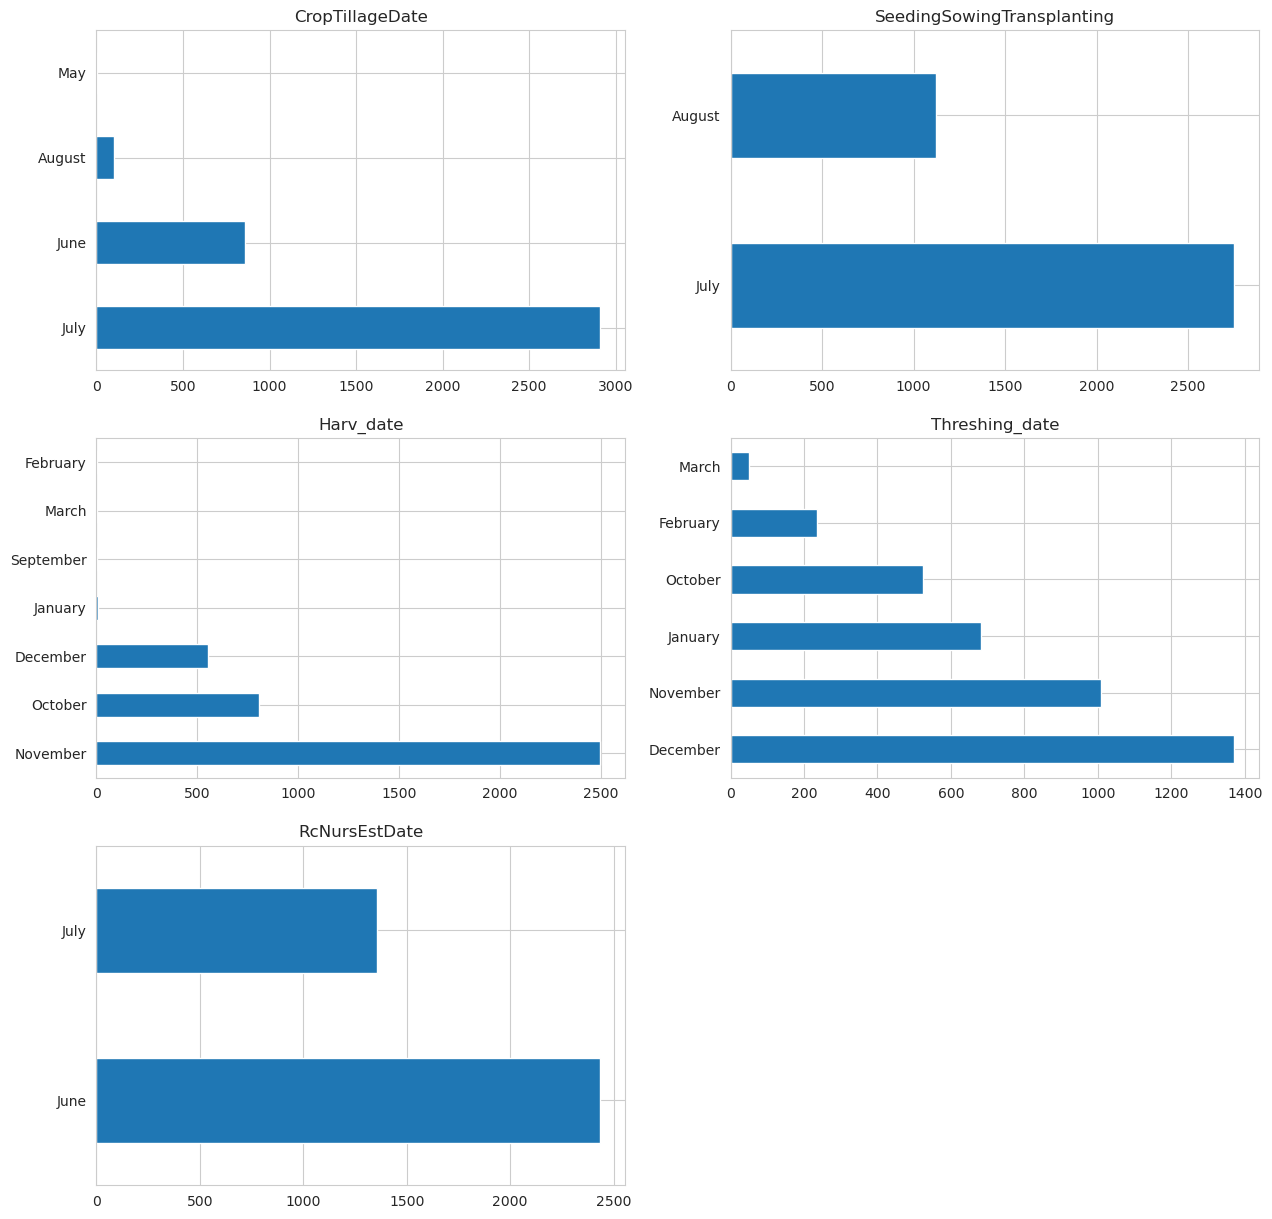

In [19]:
plt.figure(figsize=(15, 15))

for i in range(len(date_cols)):
    plt.subplot(3, 2, i+1)
    plt.title(date_cols[i])
    df[date_cols[i]].dt.month_name().value_counts().plot.barh()

By grouping the dates by month, we observe that, for each variable, the values are concentrated around a few specific months. This makes it easier to visualize the distribution of these variables.

Let us now move on to analyze the relationship between each of the non-numerical characteristics, with the exception of those with high cardinality requiring greater processing, and the *Yield* variable.

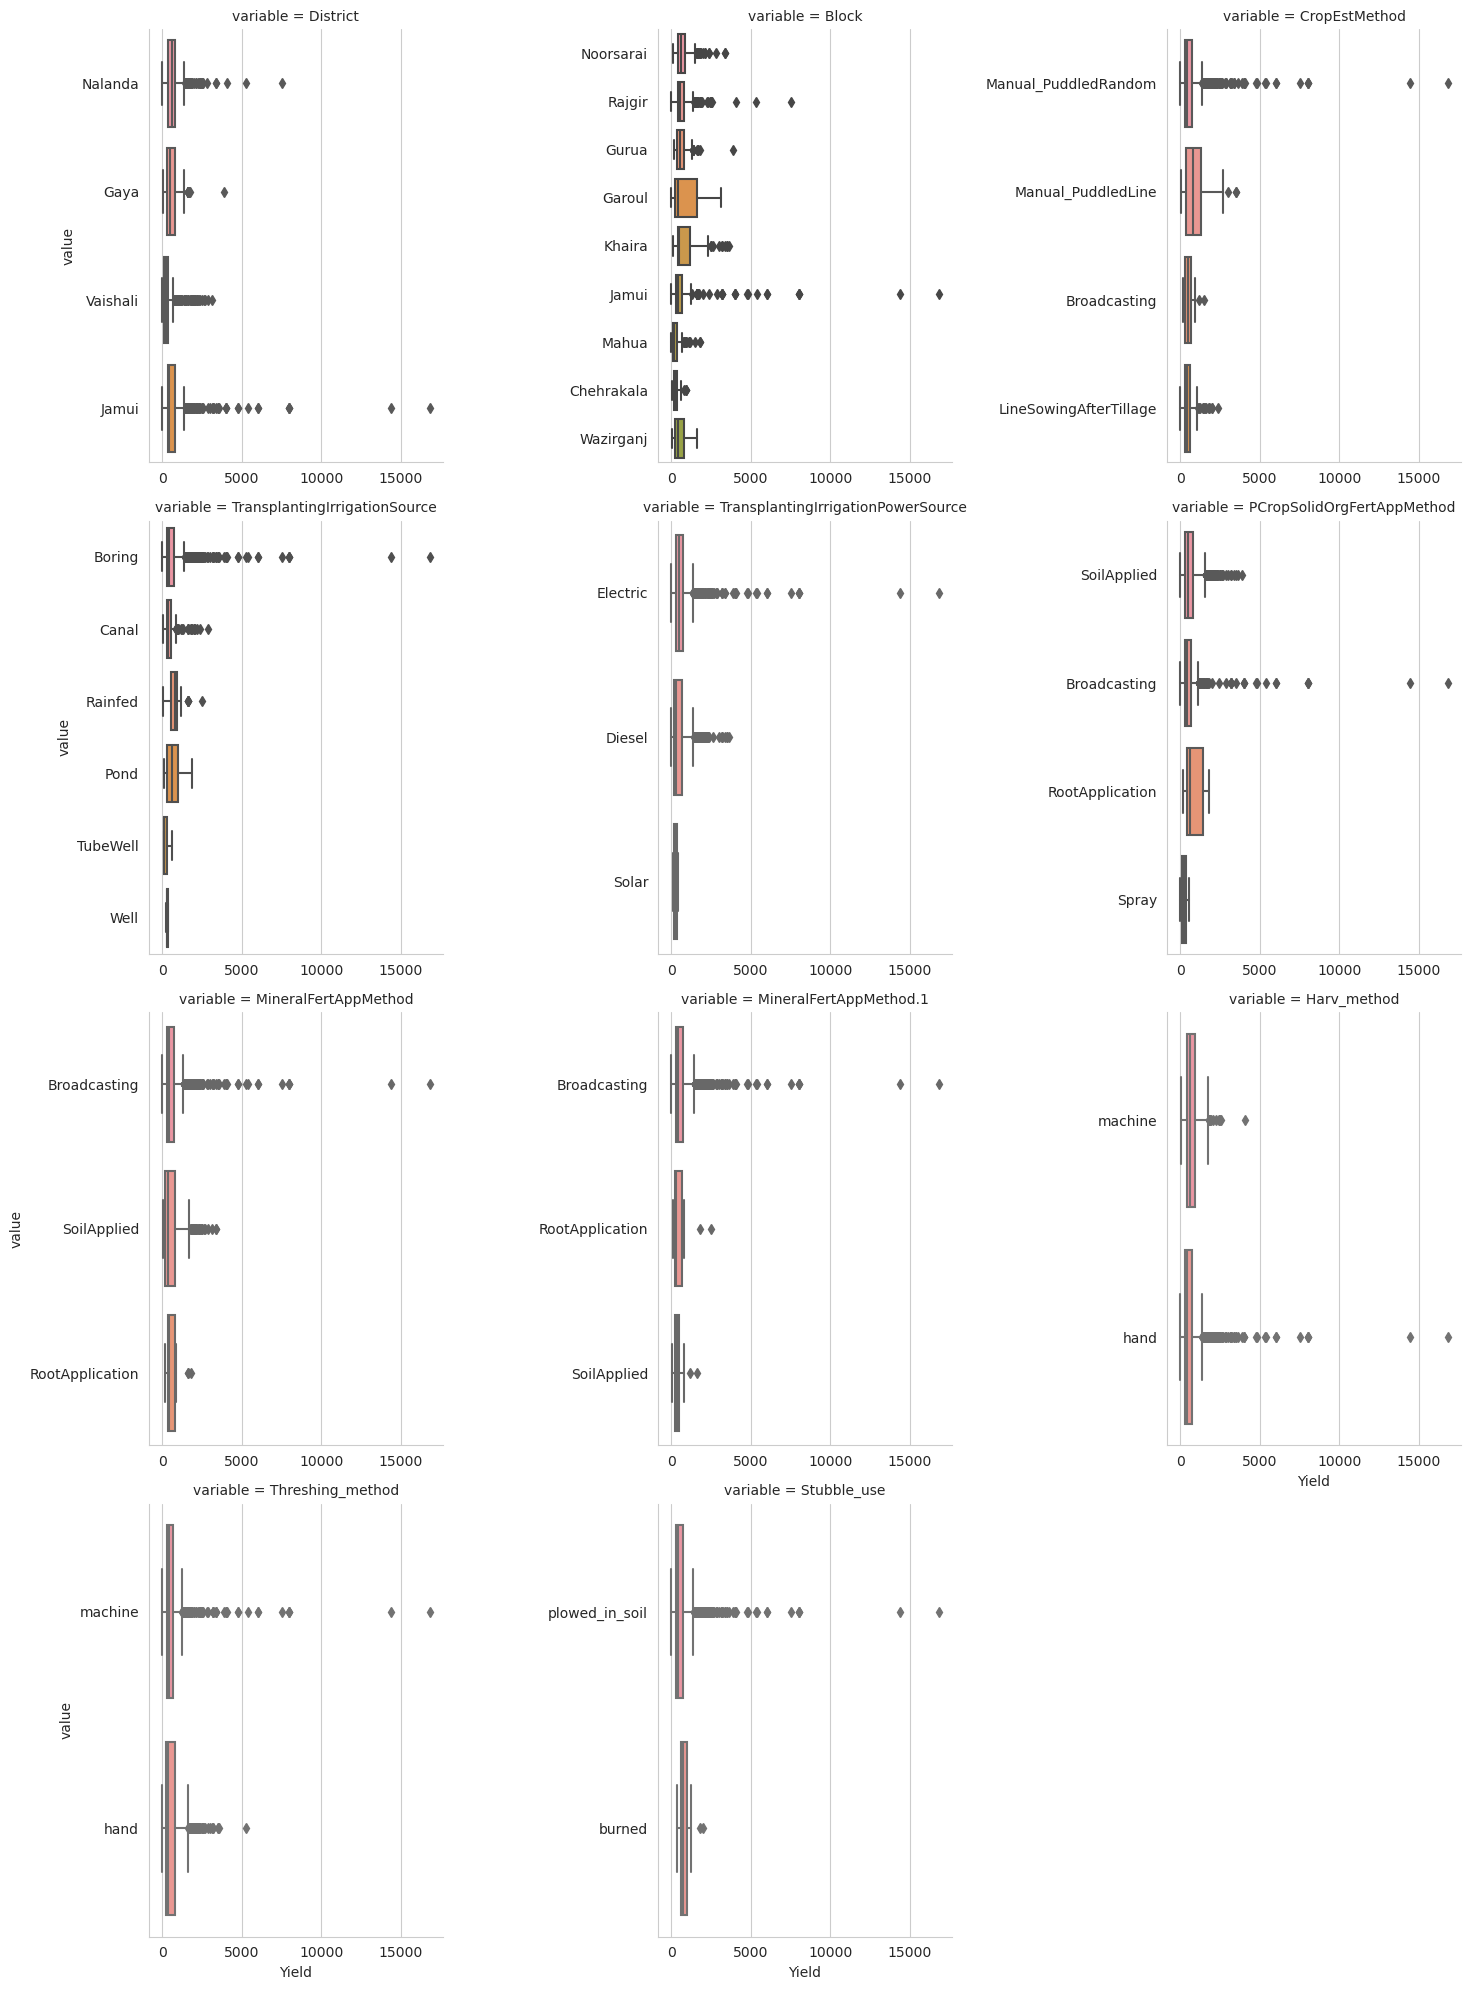

In [20]:
cols = df.select_dtypes("O").nunique()[df.select_dtypes("O").nunique() < 10].index.to_list()

sns.catplot(
    x="Yield",
    y="value",
    col="variable",
    kind="box",
    sharey=False,
    sharex=False,
    col_wrap=3,
    data=df.melt(id_vars=["Yield"], value_vars=cols)
);

We see that the values of these characteristics can influence the range of the *Yield* values. In addition, we identified the classes that contain the most important anomalies, thus affecting these same areas.

Now let's analyze the relationship between dates and the variable *Yield*

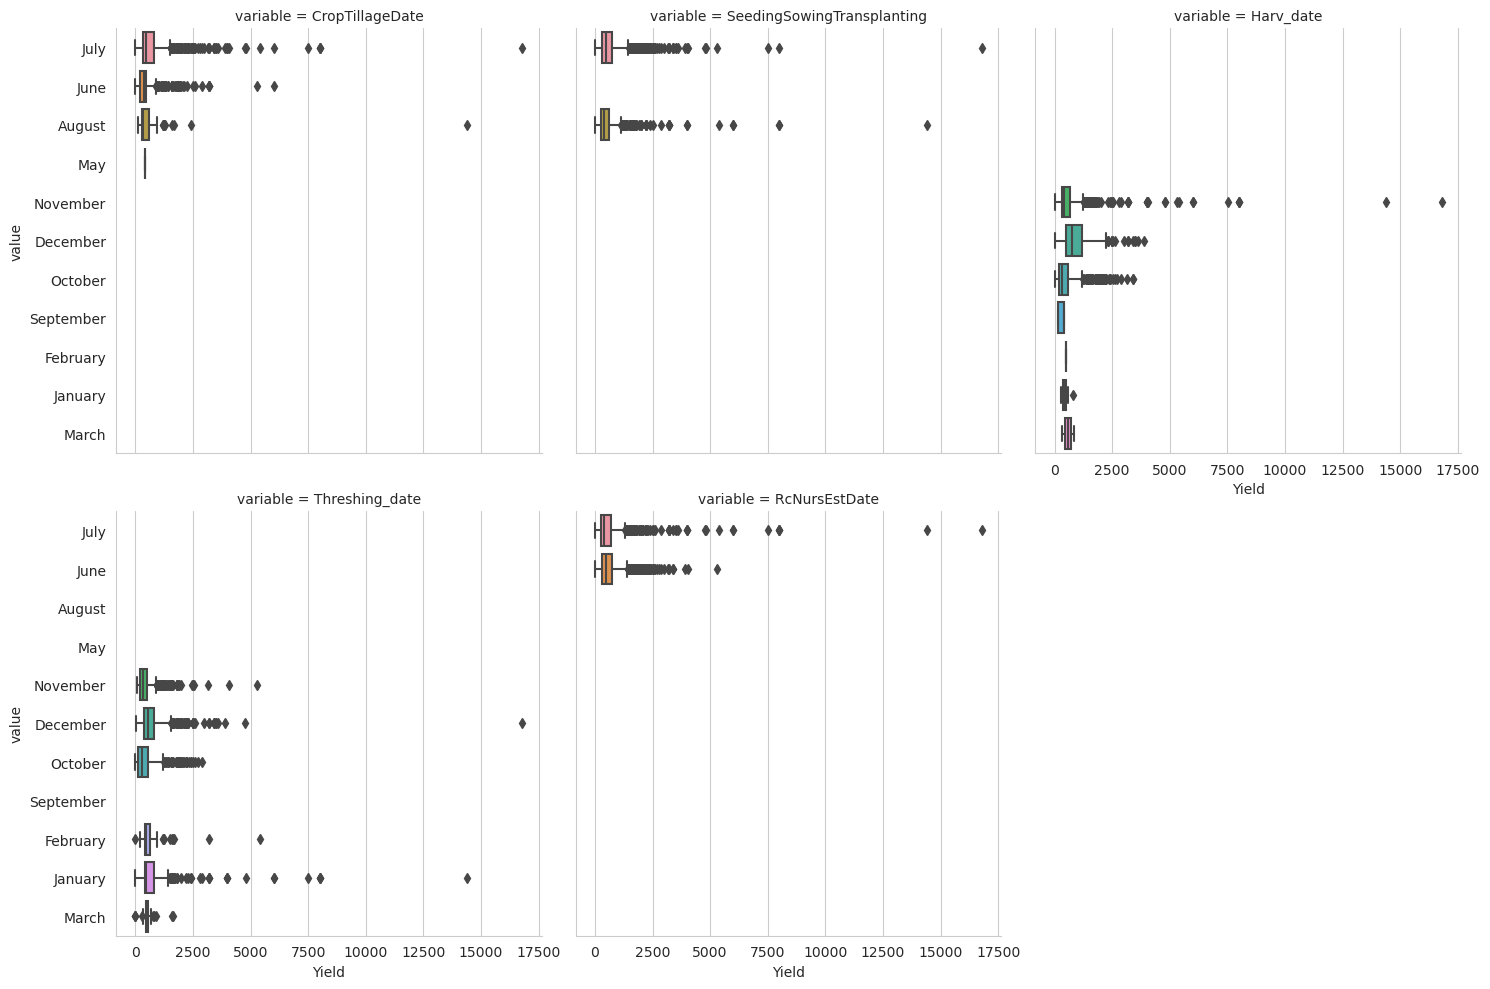

In [21]:
_df = df[date_cols+["Yield"]]
for col in date_cols:
    _df[col] = df[col].dt.month_name() 

sns.catplot(
    x="Yield",
    y="value",
    col="variable",
    kind="box",
    col_wrap=3,
    data=_df.melt(id_vars=["Yield"], value_vars=date_cols)
);

Similar to the last result, the values of each feature affect the range of *Yield* values and we detect a handful of outliers.

To see if non-numeric variables really have an influence on yield, we will perform a hypothesis test. We will use a “permutation test” which will avoid us having to formulate hypotheses about the distributions of the variables. In addition, we will set a minimum for the number of elements in a group in order to avoid including groups that are not sufficiently represented in our data. We will set a significance threshold $\alpha=0.05$ and we will formulate the following hypotheses:

- H0: The variable does not affect the yield
- H1: The variable influences the yield.

In [22]:
import scipy.stats as stats


cols = df.select_dtypes("O").nunique()[df.select_dtypes("O").nunique() < 10].index.to_list()

np.random.seed(42)


def statistic(*data):
    means = np.array([d.mean() for d in data]) - np.concatenate(data).mean()
    return (means ** 2).sum()/len(means) 

res = []
for col in cols:
    data = [df[df[col] == c].Yield for c in df[col].unique() if len(df[df[col] == c].Yield) > 20]
    p = stats.permutation_test(data, statistic, n_resamples=5000).pvalue
    res.append({"variable": col, "pvalue": p})

_df = df[date_cols+["Yield"]]
for col in date_cols:
    _df[col] = df[col].dt.month_name() 
    data = [_df[_df[col] == c].Yield for c in _df[col].unique() if len(_df[_df[col] == c].Yield) > 20]
    p = stats.permutation_test(data, statistic, n_resamples=5000).pvalue
    res.append({"variable": col, "pvalue": p})

    
res = pd.DataFrame(res).set_index("variable")
res["statistically significant"] = res["pvalue"] < 0.05
res

,pvalue,statistically significant
variable,,
District,0.000400,True
Block,0.000400,True
CropEstMethod,0.003599,True
TransplantingIrrigationSource,0.065587,False
TransplantingIrrigationPowerSource,0.017996,True
PCropSolidOrgFertAppMethod,0.361528,False
MineralFertAppMethod,0.687063,False
MineralFertAppMethod.1,0.164767,False
Harv_method,0.001600,True


We can see which variables are statistically significant at the threshold $\alpha=0.05$ and which can therefore be considered as having an influence on the yield.

We observed the different variables in our table. We took a look at the missing values and highlighted the outliers. We also analyzed the distributions of the different variables as well as their relationships with the variable to be predicted to see their predictive potential.

## 2. Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import set_config

set_config(transform_output="pandas")

Now we will build our model. Using the previous analysis and reading the variable description, we will establish a strategy to handle missing data, handle outliers, and perform variable selection for the model by checking for multicollinearities and choosing the variables with the most predictive potential. We will also need to get rid of features like *District* or *Block* which are too specific to our dataset and cannot help us build a general purpose model.

Let's first define a function to eliminate anomalies due to errors in our data.

In [24]:
def clean(df):

    outliers = [
        "Harv_hand_rent", "1appDaysUrea",
        "SeedlingsPerPit", "TransplantingIrrigationHours",
    ]

    X = df.copy()
    
    mask = 1
    for col in outliers:
        high = X[col].quantile(0.98)
        mask &= X[col] < high

    return X[mask]

Now we will build transformers for preprocessing.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class CountTrans(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = pd.DataFrame(X.copy())
        for i in range(X.shape[1]):
            X.iloc[:,i] = X.iloc[:,i].apply(
                lambda x: 0 if x == "None" else
                    len(x.split())
            )
        return X
    
class CatMultTrans(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y=None):
        self.record = {}
        for col in X:
            self.record[col] = X[col].apply(lambda x: x.split()).explode().unique().tolist()
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X.copy())
        for col in X:
            for rec in self.record[col]:
                if rec == "Other": continue
                X[col+"."+rec] = X[col].str.contains(rec).astype(int)
            X.drop(col, axis=1, inplace=True)
        return X
    

class DatesTrans(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def convert(self, dt):
        try:
            return dt.month
        except:
            return np.nan

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X.copy())
        for i in range(X.shape[1]):
            X.iloc[:,i] = pd.to_datetime(X.iloc[:,i])
            X.iloc[:,i] = X.iloc[:,i].apply(self.convert)
        return X

In [27]:
# Numerical Features
feats_num1 = [
    'CultLand', 'Ganaura', 'CropOrgFYM',
    'BasalDAP', 'BasalUrea', 'Acre',
    '2appDaysUrea', '1appDaysUrea'
]
feats_num2 = [
    "SeedlingsPerPit", "CropTillageDepth",
    "TransIrriCost",
]

# Categorical Features
feats_obj1 = [
    'LandPreparationMethod',
]
feats_obj3 = [
    'Threshing_method'
]

# Datetime Features
feats_date = [ 
    'Harv_date', 'Threshing_date',
    'CropTillageDate', 'SeedingSowingTransplanting'
]

transform = make_column_transformer(
    # Numerical transform
    (make_pipeline(
        SimpleImputer(strategy="constant", fill_value=0),
        RobustScaler(),
    ), feats_num1),
    (make_pipeline(
        SimpleImputer(strategy="median"),
        RobustScaler(),
    ), feats_num2),
    
    # Categorical transform
    (make_pipeline(
        SimpleImputer(strategy="constant", fill_value="Other"),
        CatMultTrans()
    ), feats_obj1),
    #(make_pipeline(
    #    SimpleImputer(strategy="constant", fill_value="None"),
    #    CountTrans()
    #), feats_obj2),
    (make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder(),
    ), feats_obj3),

    # Datetime transform
    (make_pipeline(
        DatesTrans(),
        SimpleImputer(strategy="most_frequent"),
    ), feats_date),

    verbose_feature_names_out=False
)

Now let's build the model.

In [28]:
X = df.copy()
X.shape

(3870, 44)

We will carry out data cleaning and then divide our data into test data and training data.

In [29]:
X = clean(X)
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)
X_train, y_train = X_train.drop(["Yield", "ID"], axis=1), X_train.Yield
X_test, y_test = X_test.drop(["Yield", "ID"], axis=1), X_test.Yield
X_train.shape

(1878, 42)

We will build a simple model which will serve as a baseline to evaluate our model.

In [30]:
base = LinearRegression()

In [31]:
cv_res = cross_validate(base, X_train[["Acre"]], y_train, cv=5, scoring='neg_root_mean_squared_error')
-cv_res["test_score"].mean()

469.05639362417014

Let's start with a linear regression.

In [32]:
model = make_pipeline(
    transform,
    LinearRegression()
)

In [33]:
cv_res = cross_validate(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
-cv_res["test_score"].mean()

465.3070732860422

Now let's test other models to see if we can get better results.

In [34]:
mridge = make_pipeline(
    transform,
    Ridge()
)

mlasso = make_pipeline(
    transform,
    Lasso()
)

By varying the value of alpha of the ridge model we obtain the following scores:

In [35]:
gcv_res = GridSearchCV(mridge, param_grid={"ridge__alpha": np.arange(0.1, 1.0, 0.1)}, scoring='neg_root_mean_squared_error')
gcv_res.fit(X_train, y_train)
-gcv_res.cv_results_['mean_test_score']

array([465.29890409, 465.29076776, 465.28266415, 465.2745931 ,
       465.26655449, 465.25854816, 465.25057399, 465.24263182,
       465.23472153])

By varying the value of alpha of the lasso model we obtain the following scores:

In [49]:
gcv_res = GridSearchCV(mlasso, param_grid={"lasso__alpha": np.arange(0.1, 1.0, 0.1)}, scoring='neg_root_mean_squared_error')
gcv_res.fit(X_train, y_train)
-gcv_res.cv_results_['mean_test_score']

array([465.23880372, 465.17231703, 465.10949019, 465.05280076,
       465.00298042, 464.95663178, 464.91383446, 464.87456613,
       464.83822883])

In [50]:
model = gcv_res.best_estimator_

Let's evaluate the best model with the test data.

In [51]:
mean_squared_error(y_test, model.predict(X_test), squared=False)

362.29843417969175

---